In [1]:
import pandas as pd
import numpy as np
from plotnine import *

df = pd.DataFrame({
    'variable': ['gender', 'gender', 'age', 'age', 'age', 'income', 'income', 'income', 'income'],
    'category': ['Female', 'Male', '1-24', '25-54', '55+', 'Lo', 'Lo-Med', 'Med', 'High'],
    'value': [60, 40, 50, 30, 20, 10, 25, 25, 40],
    })
df['variable'] = pd.Categorical(df['variable'], categories=['gender', 'age', 'income'])
df

,variable,category,value
0,gender,Female,60
1,gender,Male,40
2,age,1-24,50
3,age,25-54,30
4,age,55+,20
5,income,Lo,10
6,income,Lo-Med,25
7,income,Med,25
8,income,High,40


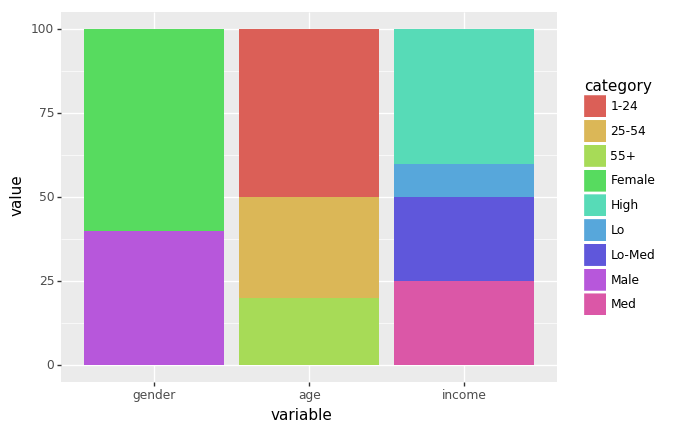

<ggplot: (271231373)>

In [2]:
(ggplot(df, aes(x='variable', y='value', fill='category'))
 + geom_col()
)

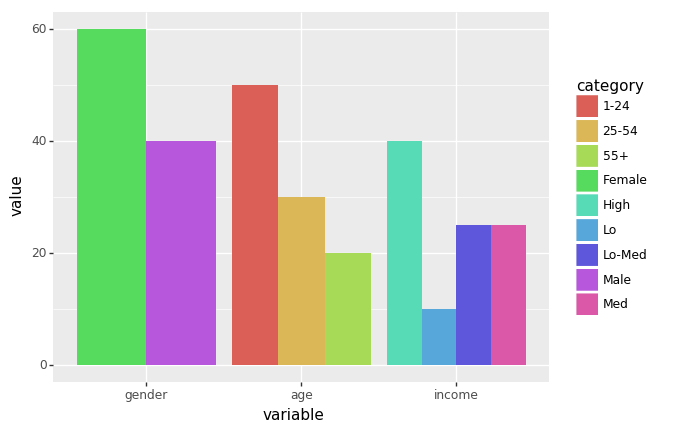

<ggplot: (294298807)>

In [3]:
(ggplot(df, aes(x='variable', y='value', fill='category'))
 + geom_col(stat='identity', position='dodge')    #①
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


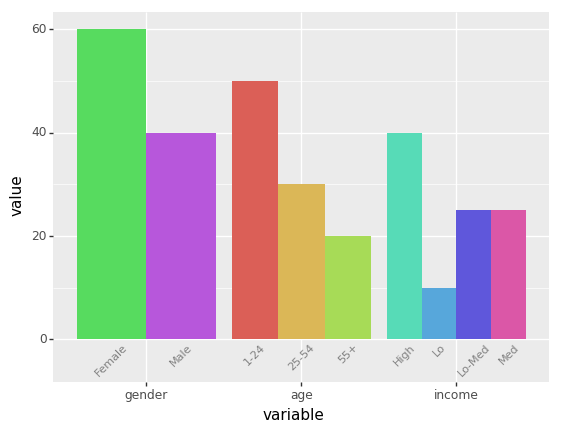

<ggplot: (296469582)>

In [4]:
dodge_text = position_dodge(width=0.9)                              # ②

(ggplot(df, aes(x='variable', y='value', fill='category'))
 + geom_bar(stat='identity', position='dodge', show_legend=False)   # ③
 + geom_text(aes(y=-.5, label='category'),                          # ④
             position=dodge_text,
             color='gray', size=8, angle=45, va='top')
 + lims(y=(-5, 60))                                                 # ⑤
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


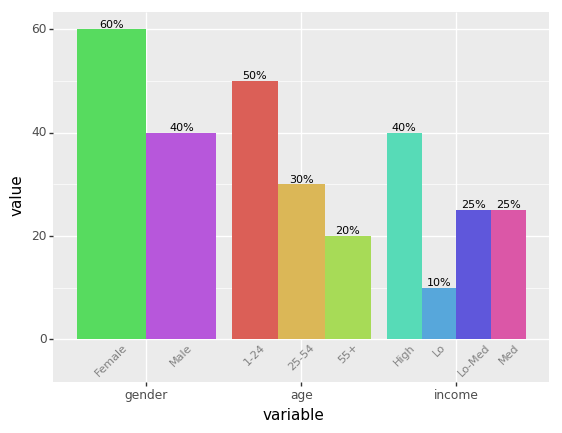

<ggplot: (294298674)>

In [5]:
dodge_text = position_dodge(width=0.9)

(ggplot(df, aes(x='variable', y='value', fill='category'))
 + geom_bar(stat='identity', position='dodge', show_legend=False)
 + geom_text(aes(y=-.5, label='category'),
             position=dodge_text,
             color='gray', size=8, angle=45, va='top')
 + geom_text(aes(label='value'),                     # ⑥
             position=dodge_text,
             size=8, va='bottom', format_string='{}%')
 + lims(y=(-5, 60))
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


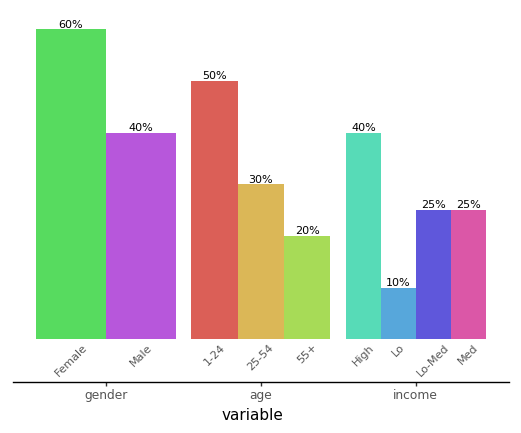

<ggplot: (296609014)>

In [6]:
dodge_text = position_dodge(width=0.9)
ccolor = '#555555'

(ggplot(df, aes(x='variable', y='value', fill='category'))
 + geom_bar(stat='identity', position='dodge', show_legend=False)
 + geom_text(aes(y=-.5, label='category'),
             position=dodge_text,
             color=ccolor, size=8, angle=45, va='top')              # ⑦
 + geom_text(aes(label='value'),
             position=dodge_text,
             size=8, va='bottom', format_string='{}%')
 + lims(y=(-5, 60))
 + theme(panel_background=element_rect(fill='white'),               # ⑧
         axis_title_y=element_blank(),
         axis_line_x=element_line(color='black'),
         axis_line_y=element_blank(),
         axis_text_y=element_blank(),
         axis_text_x=element_text(color=ccolor),
         axis_ticks_major_y=element_blank(),
         panel_grid=element_blank(),
         panel_border=element_blank())
)

In [7]:
import pandas as pd
import numpy as np
from plotnine import *

elements = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/elemanets/elements.csv")
elements.head()

,atomic number,symbol,name,atomic mass,CPK,electronic configuration,electronegativity,atomic radius,ion radius,van der Waals radius,...,EA,standard state,bonding type,melting point,boiling point,density,metal,year discovered,group,period
0,1,H,Hydrogen,1.00794,#FFFFFF,1s1,2.20,37.0,NaN,120.0,...,-73.0,gas,diatomic,14.0,20.0,0.00009,nonmetal,1766,1,1
1,2,He,Helium,4.002602,#D9FFFF,1s2,NaN,32.0,NaN,140.0,...,0.0,gas,atomic,NaN,4.0,0.00000,noble gas,1868,18,1
2,3,Li,Lithium,6.941,#CC80FF,[He] 2s1,0.98,134.0,76 (+1),182.0,...,-60.0,solid,metallic,454.0,1615.0,0.54000,alkali metal,1817,1,2
3,4,Be,Beryllium,9.012182,#C2FF00,[He] 2s2,1.57,90.0,45 (+2),NaN,...,0.0,solid,metallic,1560.0,2743.0,1.85000,alkaline earth metal,1798,2,2
4,5,B,Boron,10.811,#FFB5B5,[He] 2s2 2p1,2.04,82.0,27 (+3),NaN,...,-27.0,solid,covalent network,2348.0,4273.0,2.46000,metalloid,1807,13,2


In [8]:
elements['group'] = [-1 if g == '-' else int(g) for g in elements.group]

In [9]:
elements['bonding type'] = elements['bonding type'].astype('category')
elements['metal'] = elements['metal'].astype('category')

In [10]:
elements['atomic_number'] = elements['atomic number'].astype(str)

In [11]:
top = elements.query('group != -1').copy()
bottom = elements.query('group == -1').copy()

In [12]:
top['x'] = top.group
top['y'] = top.period

In [13]:
nrows = 2
hshift = 3.5
vshift = 3
bottom['x'] = np.tile(np.arange(len(bottom)//nrows), nrows) + hshift
bottom['y'] = bottom.period + vshift

In [14]:
tile_width = 0.95
tile_height = 0.95

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


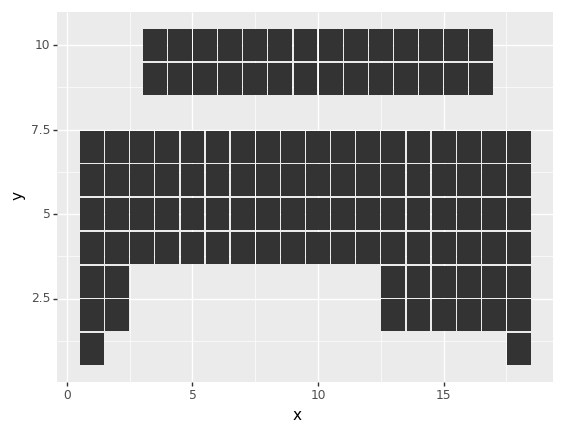

<ggplot: (296798938)>

In [15]:
(ggplot(aes('x', 'y'))                                          #⑨
 + geom_tile(top, aes(width=tile_width, height=tile_height))    #⑩
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


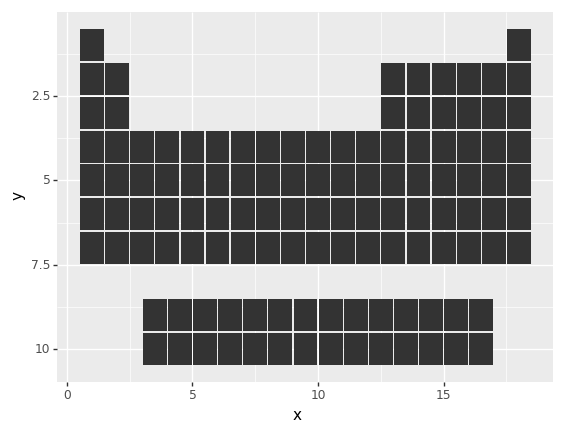

<ggplot: (-9223372036557971312)>

In [16]:
(ggplot(aes('x', 'y'))
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + scale_y_reverse() # new
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


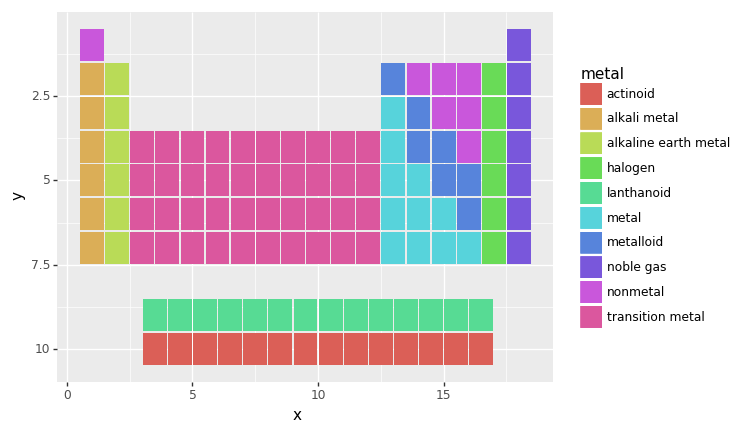

<ggplot: (296905031)>

In [17]:
(ggplot(aes('x', 'y'))
 + aes(fill='metal')  # new
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + scale_y_reverse()
)

In [18]:
def inner_text(data):
    layers = [geom_text(data, aes(label='atomic_number'), 
                        nudge_x=-0.40, nudge_y=0.40,
                        ha='left', va='top', fontweight='normal', size=6),
              geom_text(data, aes(label='symbol'), 
                         nudge_y=.1, size=9),
              geom_text(data, aes(label='name'), 
                        nudge_y=-0.125, fontweight='normal', size=4.5),
              geom_text(data, aes(label='atomic mass'), 
                         nudge_y=-.3, fontweight='normal', size=4.5)]
    return layers

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


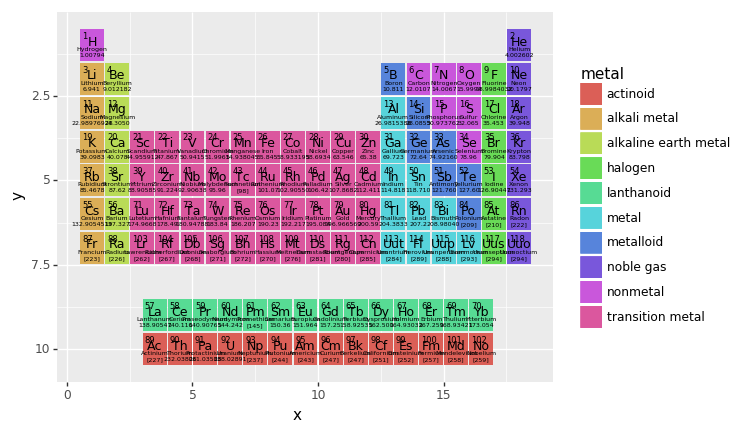

<ggplot: (-9223372036557971235)>

In [19]:
(ggplot(aes('x', 'y'))
 + aes(fill='metal')
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + inner_text(top)    # new
 + inner_text(bottom) # new
 + scale_y_reverse()
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


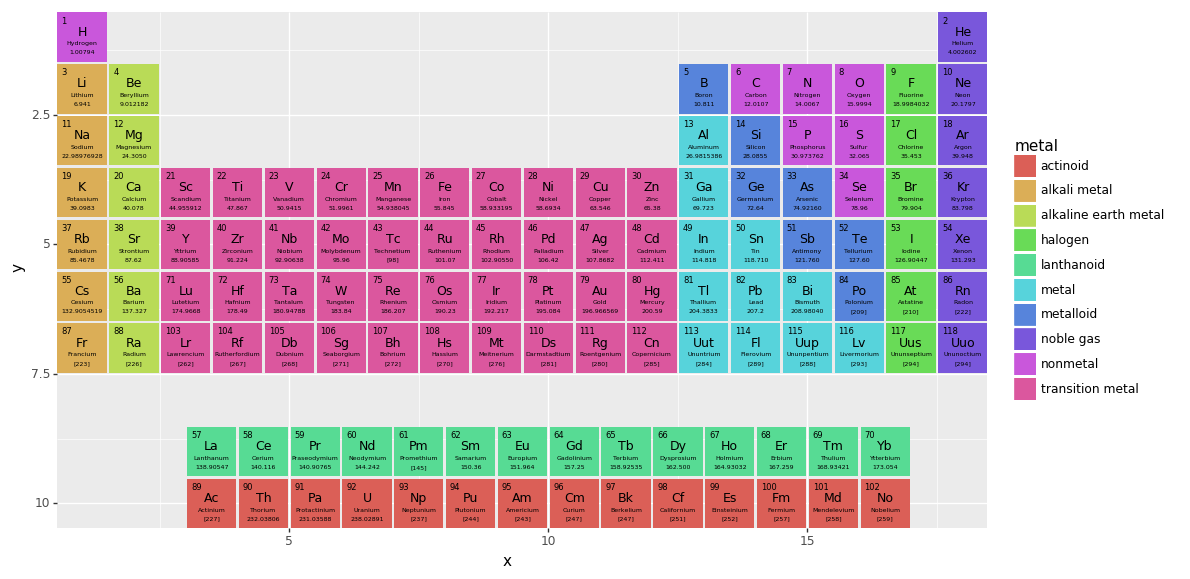

<ggplot: (296702433)>

In [20]:
(ggplot(aes('x', 'y'))
 + aes(fill='metal')
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + inner_text(top)
 + inner_text(bottom)
 + scale_y_reverse()
 + coord_equal(expand=False)   # new
 + theme(figure_size=(12, 6))  # new
)

In [21]:
split_df = pd.DataFrame({
    'x': 3-tile_width/4,
    'y': [6, 7],
    'metal': pd.Categorical(['lanthanoid', 'actinoid'])
})

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pl

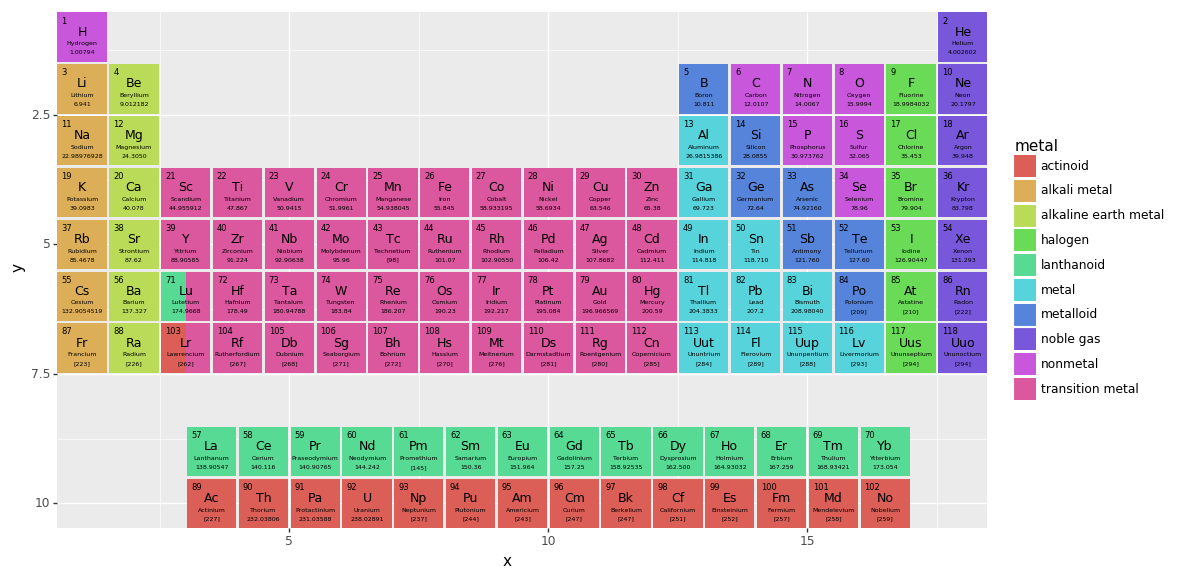

<ggplot: (-9223372036557319045)>

In [22]:
(ggplot(aes('x', 'y'))
 + aes(fill='metal')
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(split_df, aes(width=tile_width/2, height=tile_height))  # ⑪
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + inner_text(top)
 + inner_text(bottom)
 + scale_y_reverse()
 + coord_equal(expand=False)
 + theme(figure_size=(12, 6))
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pl

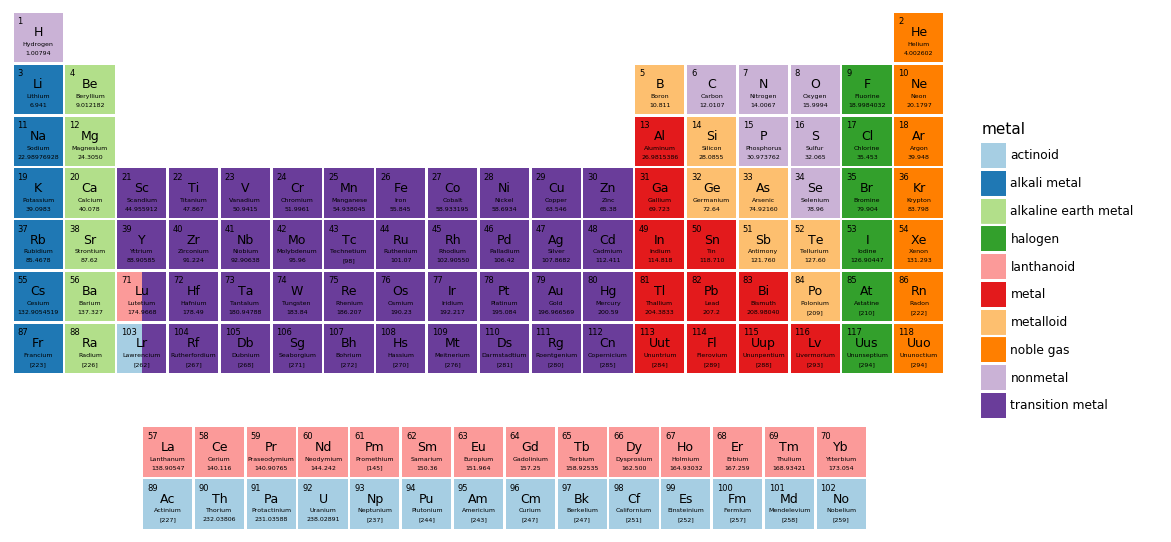

<ggplot: (-9223372036556599159)>

In [23]:
(ggplot(aes('x', 'y'))
 + aes(fill='metal')
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(split_df, aes(width=tile_width/2, height=tile_height))
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + inner_text(top)
 + inner_text(bottom)
 + scale_y_reverse()
 + scale_fill_brewer(type='qual', palette=3)         # ⑫
 + coord_equal(expand=False)
 + theme_void()                                      # ⑬
 + theme(figure_size=(12, 6),
         plot_background=element_rect(fill='white')) # ⑭

)

In [24]:
groupdf = pd.DataFrame({
    'group': range(1, 19),
    'y': np.repeat([1, 2, 4, 2, 1], [1, 1, 10, 5, 1])})
groupdf

,group,y
0,1,1
1,2,2
2,3,4
3,4,4
4,5,4
5,6,4
6,7,4
7,8,4
8,9,4
9,10,4


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pl

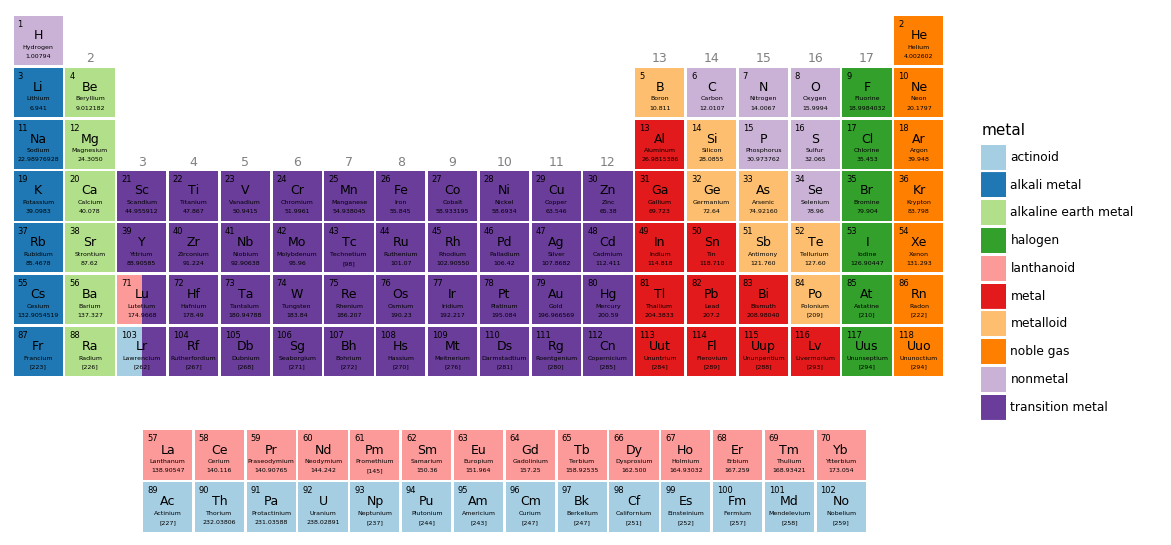

<ggplot: (296462698)>

In [25]:
(ggplot(aes('x', 'y'))    # ⑯
 + aes(fill='metal')      # ⑰
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(split_df, aes(width=tile_width/2, height=tile_height))
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + inner_text(top)
 + inner_text(bottom)
 + geom_text(groupdf, aes('group', 'y', label='group'), 
             color='gray', nudge_y=.525, va='bottom',
             fontweight='normal', size=9, inherit_aes=False)    # ⑮
 + scale_y_reverse()                    
 + scale_fill_brewer(type='qual', palette=3)
 + coord_equal(expand=False)
 + theme_void()
 + theme(figure_size=(12, 6),
         plot_background=element_rect(fill='white'),)
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pl

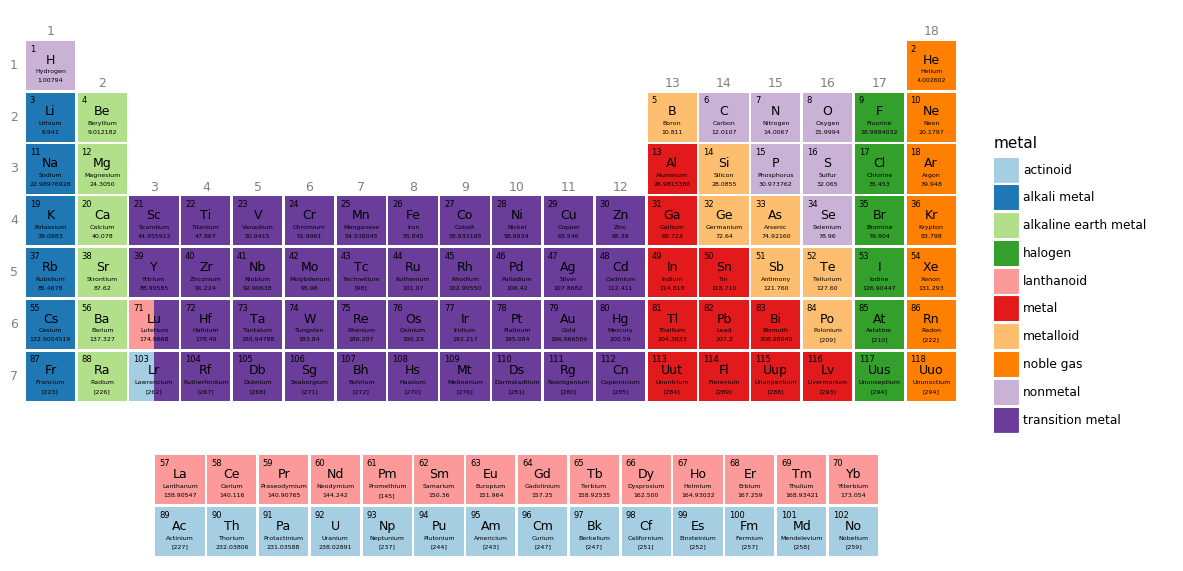

<ggplot: (296570102)>

In [26]:
(ggplot(aes('x', 'y'))
 + aes(fill='metal')
 + geom_tile(top, aes(width=tile_width, height=tile_height))
 + geom_tile(split_df, aes(width=tile_width/2, height=tile_height))
 + geom_tile(bottom, aes(width=tile_width, height=tile_height))
 + inner_text(top)
 + inner_text(bottom)
 + geom_text(groupdf, aes('group', 'y', label='group'), color='gray', nudge_y=.525,
             va='bottom',fontweight='normal', size=9, inherit_aes=False)    
 + scale_y_reverse(breaks=range(1, 8), limits=(0, 10.5))                    # ⑱
 + scale_fill_brewer(type='qual', palette=3)
 + coord_equal(expand=False)
 + theme_void()
 + theme(figure_size=(12, 6),
         plot_background=element_rect(fill='white'),
         axis_text_y=element_text(margin={'r': 5}, color='gray', size=9)    # ⑲
         )
)